In [0]:
import numpy as np 
import pandas as pd 
from keras.models import Sequential
from keras.layers import LSTM,Dense
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [0]:
data = pd.read_csv('fruits.csv')
cl = data['x']

In [0]:
scl = MinMaxScaler()
#Scale the data
cl = cl.values.reshape(cl.shape[0],1)
cl = scl.fit_transform(cl)
print(cl.shape)

(174, 1)


In [0]:
def processData(data,lb):
    X,Y = [],[]
    for i in range(len(data)-lb-1):
        X.append(data[i:(i+lb),0])
        Y.append(data[(i+lb),0])
    return np.array(X),np.array(Y)
X,y = processData(cl,3)
X_train,X_test = X[:int(X.shape[0]*0.80)],X[int(X.shape[0]*0.80):]
y_train,y_test = y[:int(y.shape[0]*0.80)],y[int(y.shape[0]*0.80):]
print(X_train.shape[0])
print(X_test.shape[0])
print(y_train.shape[0])
print(y_test.shape[0])

136
34
136
34


In [0]:
model = Sequential()
model.add(LSTM(50,input_shape=(3,1)))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mse')
#Reshape data for (Sample,Timestep,Features) 
X_train = X_train.reshape((X_train.shape[0],X_train.shape[1],1))
X_test = X_test.reshape((X_test.shape[0],X_test.shape[1],1))
#Fit model with history to check for overfitting
history = model.fit(X_train,y_train,epochs=400,validation_data=(X_test,y_test),shuffle=False)

Train on 136 samples, validate on 34 samples
Epoch 1/400
136/136 [==============================] - 2s 12ms/step - loss: 0.1653 - val_loss: 0.3070
Epoch 2/400
136/136 [==============================] - 0s 252us/step - loss: 0.1353 - val_loss: 0.2544
Epoch 3/400
136/136 [==============================] - 0s 241us/step - loss: 0.1079 - val_loss: 0.2059
Epoch 4/400
136/136 [==============================] - 0s 271us/step - loss: 0.0838 - val_loss: 0.1621
Epoch 5/400
136/136 [==============================] - 0s 230us/step - loss: 0.0634 - val_loss: 0.1235
Epoch 6/400
136/136 [==============================] - 0s 238us/step - loss: 0.0470 - val_loss: 0.0910
Epoch 7/400
136/136 [==============================] - 0s 237us/step - loss: 0.0353 - val_loss: 0.0656
Epoch 8/400
136/136 [==============================] - 0s 238us/step - loss: 0.0286 - val_loss: 0.0481
Epoch 9/400
136/136 [==============================] - 0s 229us/step - loss: 0.0264 - val_loss: 0.0380
Epoch 10/400
136/136 [=======

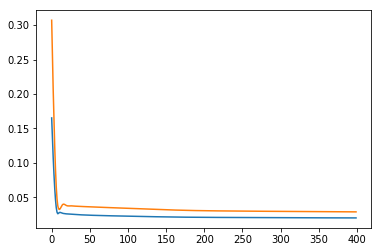

In [0]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [0]:
X_test[0]

array([[0.28840193],
       [0.25736405],
       [0.27175831]])

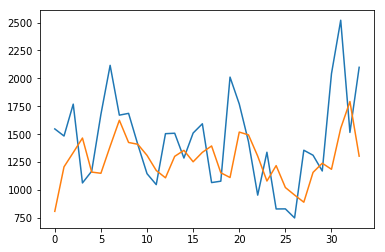

In [0]:
Xt = model.predict(X_test)
plt.plot(scl.inverse_transform(y_test.reshape(-1,1)))
plt.plot(scl.inverse_transform(Xt))

In [0]:
act = []
pred = []
i=33
Xt = model.predict(X_test[i].reshape(1,3,1))
print('predicted:{0}, actual:{1}'.format(scl.inverse_transform(Xt),scl.inverse_transform(y_test[i].reshape(-1,1))))
pred.append(scl.inverse_transform(Xt))
act.append(scl.inverse_transform(y_test[i].reshape(-1,1)))

predicted:[[1302.9363]], actual:[[2098.96]]


In [0]:
result_df = pd.DataFrame({'pred':list(np.reshape(pred, (-1))),'act':list(np.reshape(act, (-1)))})

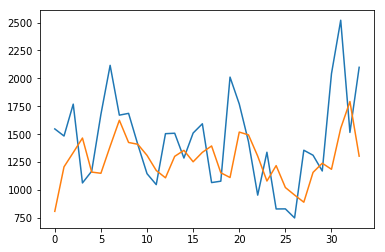

In [0]:
Xt = model.predict(X_test)
plt.plot(scl.inverse_transform(y_test.reshape(-1,1)))
plt.plot(scl.inverse_transform(Xt))

In [0]:
X_test[33]

array([[0.80986218],
       [1.        ],
       [0.60059294]])